In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
train_data = datasets.MNIST(root='./data', download=True, train=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', download=True, train=False, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.77MB/s]


In [ ]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
len(train_data.classes)

10

In [ ]:
train = DataLoader(train_data, batch_size=32)
test = DataLoader(test_data, batch_size=32)

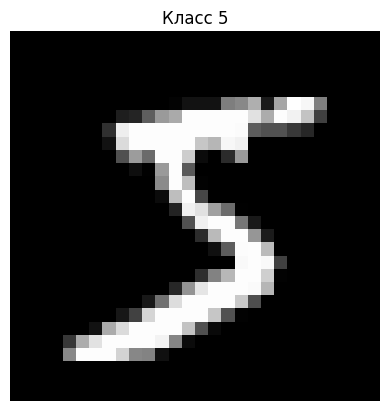

In [ ]:
image, label = next(iter(train))
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f'Класс {label[0]}')
plt.axis('off')
plt.savefig('test')
plt.show()

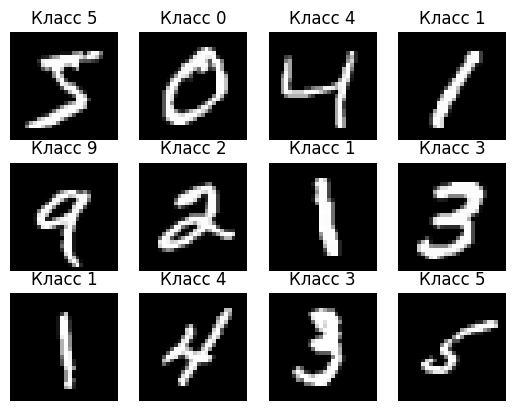

In [ ]:
image, label = next(iter(train))
for i in range(12):
    plt.subplot(3, 4, i +1)
    plt.imshow(image[i].squeeze(), cmap='gray')
    plt.title(f'Класс {label[i]}')
    plt.axis('off')
plt.savefig('test2')
plt.show()

In [ ]:
class CheckImage(nn.Module):
    def __init__(self):
        super().__init__()

        self.first = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.second = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 14 * 14, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        x = self.first(x)
        x = self.second(x)
        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
model = CheckImage().to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(50):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f'Эпоха {epoch +1} -- Потери: {round(total_loss, 2)}')

Эпоха 1 -- Потери: 5.77
Эпоха 2 -- Потери: 6.63
Эпоха 3 -- Потери: 4.4
Эпоха 4 -- Потери: 7.94
Эпоха 5 -- Потери: 6.28
Эпоха 6 -- Потери: 4.18
Эпоха 7 -- Потери: 8.38
Эпоха 8 -- Потери: 5.56
Эпоха 9 -- Потери: 4.17
Эпоха 10 -- Потери: 8.03
Эпоха 11 -- Потери: 4.7
Эпоха 12 -- Потери: 5.23
Эпоха 13 -- Потери: 3.62
Эпоха 14 -- Потери: 4.58
Эпоха 15 -- Потери: 5.87
Эпоха 16 -- Потери: 1.67
Эпоха 17 -- Потери: 3.89
Эпоха 18 -- Потери: 4.86
Эпоха 19 -- Потери: 5.57
Эпоха 20 -- Потери: 4.43
Эпоха 21 -- Потери: 2.5
Эпоха 22 -- Потери: 6.04
Эпоха 23 -- Потери: 3.55
Эпоха 24 -- Потери: 5.24
Эпоха 25 -- Потери: 2.93
Эпоха 26 -- Потери: 3.71
Эпоха 27 -- Потери: 3.99
Эпоха 28 -- Потери: 3.62
Эпоха 29 -- Потери: 1.66
Эпоха 30 -- Потери: 5.75
Эпоха 31 -- Потери: 3.51
Эпоха 32 -- Потери: 3.85
Эпоха 33 -- Потери: 2.51
Эпоха 34 -- Потери: 0.7
Эпоха 35 -- Потери: 6.21
Эпоха 36 -- Потери: 5.09
Эпоха 37 -- Потери: 3.11
Эпоха 38 -- Потери: 2.57
Эпоха 39 -- Потери: 3.17
Эпоха 40 -- Потери: 2.3
Эпоха 41 -- По

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for x_batch, y_batch in test:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        prediction = torch.argmax(y_pred, dim=1)
        total += y_batch.size(0)
        correct += (prediction == y_batch).sum().item()

accuracy = correct * 100 / total
print(f'Точность модели на тестовых данных: {round(accuracy, 2)}%')

Точность модели на тестовых данных: 98.34%


In [ ]:
torch.save(model.state_dict(), 'model.pth')